## Compresser une image sans dégrader sa qualité visuelle

## ANANOS Morgane

## BYMBOUTSA MOUNDOUNGA Charly Darcy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import scipy
import huffman
from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow
from scipy import fftpack
import matplotlib.pylab as pylab

%matplotlib inline 


### Q.1 Pour réduire significativement la taille de l'image, quelles sont à votre avis les informations d'une image qui pourraient être éliminées sans trop dégrader le contenu de l'image ?

Pour réduire signicativement la taille d'une image sans trop la dégrader, nous pouvons négliger les plus hautes fréquences lors de la compression qui sont les moins visible par l'oeil humain.

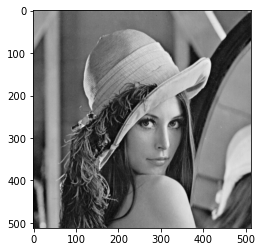

In [31]:
#lecture image Lena.png
image = cv2.imread('C:/Users/Morgane/Documents/COURS/image_et_filtre/td3/lena.png',0)
plt.figure()
plt.imshow(image, cmap = 'gray')
plt.show()

### Q.2 Calculer la DCT sur l'image en entier et commenter les résultats obtenus.

##### Définition DCT et iDCT en 2D
#### Utiliser la fontion scipy.fftpack.dct
#### https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html


##### https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dct.html  <- site conseillé  


In [3]:
#Fonction pour calculer la DCT en 2D
def dct2(image): #domaine spatial -> domaine fréquentiel pour une DCT en 2D  axex (0=ligne et 1=colonne)
    DCT_colonne= scipy.fftpack.dct(image, axis=1, norm='ortho') #calcul DCT sur les colonnes de l'image
    DCT_ligne= scipy.fftpack.dct(DCT_colonne, axis=0, norm='ortho') #calcul DCT sur les lignes des colonnes de l'image
    return DCT_ligne
def idct2(image): #domaine fréquentiel -> domaine spacial 
    IDCT_colonne= scipy.fftpack.idct(image, axis=1, norm='ortho')
    IDCT_ligne= scipy.fftpack.idct(IDCT_colonne, axis=0, norm='ortho')
    return IDCT_ligne

##### Calculer la DCT sur l'image en entier

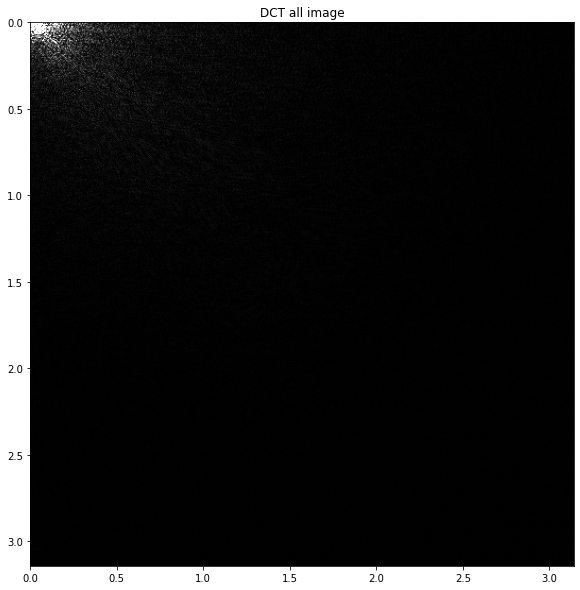

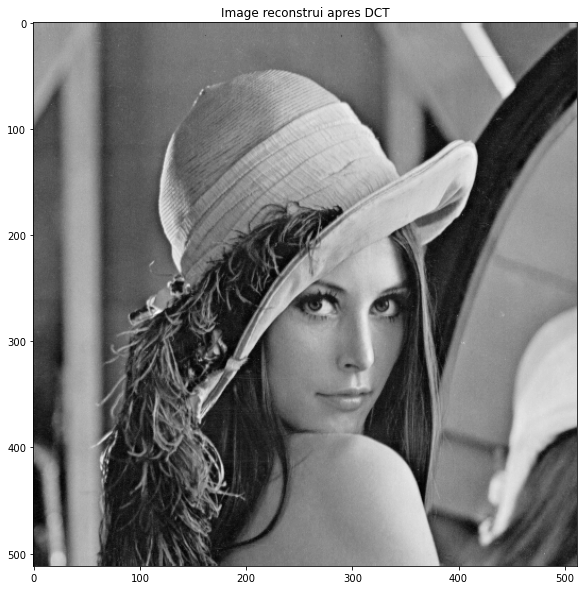

In [4]:
# calcul de la DCT2 sur l'image entière
dct_image = dct2(image)

# affichage de la DCT2 sur l'image entière
plt.figure(figsize = (20,10))
plt.imshow(np.absolute(dct_image),cmap='gray',vmax=np.max(dct_image)*0.01,vmin = 0, extent=[0,pi,pi,0])# pour afficher la DCT 
                                                                                                     # ajouter ces paramètres à la fonction 
                                                                                                     # plt.imshow
plt.title( "DCT all image")
plt.show()

#affichage iDCT2 sur l'image entière
image_rec = idct2(dct_image)
plt.figure(figsize = (20,10))
plt.imshow(image_rec, cmap = 'gray')
plt.title( "Image reconstruite apres DCT")
plt.show()

<span style="color:blue">Commentaire de la DCT obtenu.</span>

### Q.3: Calculer la DCT sur des blocs de l'image de taille 8x8
<span style="color:blue">Réaliser une fonction pour calculer la DCT sur chaque bloc 8x8</span>

In [5]:
def dct_par_bloc(img):
    mat_bloc=np.zeros((img.shape[0],img.shape[1]))
    for i in range(0,img.shape[0],8) : # défile sur l'axe i de l'image 
        for j in range(0,img.shape[1],8) : # défile sur l'axe j de l'image 
            mat_bloc[i:i+8,j:j+8]=dct2(img[i:i+8,j:j+8]) #dct sur un bloc de pixel 8*8
    return mat_bloc

<span style="color:blue">Afficher un seul bloc et voir les coefficients</span>

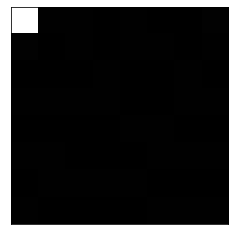

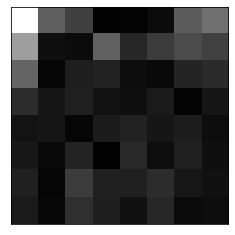

array([[ 1.28350000e+03,  4.76826286e+00,  3.24037748e+00,
        -1.99196352e-01,  2.50000000e-01, -5.53888309e-01,
        -4.58938490e+00,  5.63845704e+00],
       [ 7.94733152e+00, -7.87872733e-01,  5.54728865e-01,
        -4.93231537e+00,  1.96023714e+00,  2.97842693e+00,
        -3.79714537e+00,  3.32218724e+00],
       [-5.03491014e+00, -2.97398357e-01, -1.55177670e+00,
         1.72497641e+00, -6.76495125e-01, -4.52498515e-01,
         1.84987373e+00, -2.20024786e+00],
       [ 2.26188463e+00,  1.13903491e+00,  1.70385403e+00,
         9.24219418e-01, -7.60609030e-01, -1.36862709e+00,
         2.14281897e-01,  1.14223005e+00],
       [-1.00000000e+00, -1.14970130e+00, -3.43055265e-01,
        -1.35962376e+00,  1.75000000e+00,  1.11885470e+00,
        -1.48149016e+00, -6.72885067e-01],
       [ 1.21067055e+00,  4.56119520e-01, -1.80209505e+00,
        -1.06063953e-01, -2.01158492e+00,  7.09664059e-01,
         1.68664969e+00,  7.55151437e-01],
       [-1.70284463e+00,  2.649531

In [6]:
img_small=dct2(image[0:8,0:8])
#img_small=dct_par_bloc(image[0:8,0:8])
plt.imshow(img_small,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(np.absolute(img_small),cmap='gray',vmax=np.max(img_small)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.xticks([]), plt.yticks([])
plt.show()


img_small[0:8,0:8]

On constate que le premier point de l'image (en haut à gauche / le pixel blanc) obtient la plus grande valeur : 1283,5.
Toutes les autres valeurs sont autour de 0.

<span style="color:blue">Afficher la DCT par bloc sur toute l'image</span>

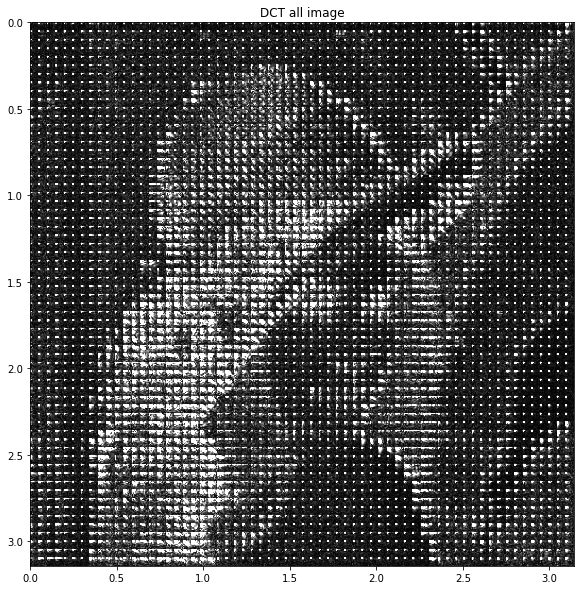

In [7]:
#affichage iDCT2 sur l'image entière
dct_image = dct_par_bloc(image)
plt.figure(figsize = (20,10))
# pour afficher la DCT 
plt.imshow(np.absolute(dct_image),cmap='gray',vmax=np.max(dct_image)*0.01,vmin = 0, extent=[0,pi,pi,0])
                                                                                                     # ajouter ces paramètres à la fonction 
plt.title( "DCT all image")
plt.show()


<span style="color:blue">Est-il préférable de travailler avec des blocs de pixels (de taille 8x8 par exemple) ou
bien sur une image entière?</span>

### Q.4 Définir une fontion pour faire la QUANTIFICATION et calculer l'image après la quantification

In [8]:
# Matrice de quantification
def quantification(N, qualite):
    """
    N = size taille du bloc
    qualite=facteur de qualité?
    """
    #Attention !! fusion des deux definitions!!! il faudra donc modifier pour enlever l'image
    dct_image = dct_par_bloc(image) #image ou N taille?
    matrice_quantification=np.zeros((N,N))
    for i in range(N) : # défile sur l'axe i de l'image 
        for j in range(N) : # défile sur l'axe j de l'image 
            matrice_quantification[i,j]=1+((1+i+j)*qualite)   
    return matrice_quantification


In [9]:
# fonction pour obtenir l'image après quantification
def image_rec_apres_quant(dct, qualite):
    """
    dct = image apres la DCT
    qualite=facteur de qualite
    """
    #taille de l'image
    N=dct.shape[0] 
    img_rec_entiere=np.zeros((N,N))
    #matrice de quantification
    mat_quantif=quantification(N,qualite)
    
    #quantification de l'image en divisant par la matrice de quantification
    for i in range(N) : # défile sur l'axe i de l'image 
        for j in range(N) : # défile sur l'axe j de l'image 
            img_rec_entiere[i,j] = round(dct[i,j]/mat_quantif[i,j])
            
    return idct2(img_rec_entiere)

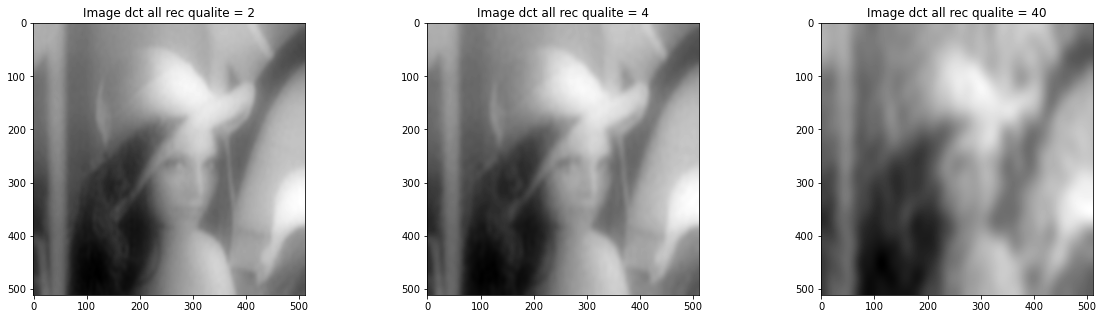

In [10]:
 # quantification image entière avec facteur de qualité = [2,4,40]
dct_image = dct2(image)
image_rec_all_1 = image_rec_apres_quant(dct_image, 2)
image_rec_all_2 = image_rec_apres_quant(dct_image, 4)
image_rec_all_3 = image_rec_apres_quant(dct_image, 40)

plt.figure(figsize = (20,5))
plt.subplot(131)
plt.imshow(image_rec_all_1, cmap = 'gray')
plt.title('Image dct all rec qualite = 2')
plt.subplot(132)
plt.imshow(image_rec_all_2, cmap = 'gray')
plt.title('Image dct all rec qualite = 4')
plt.subplot(133)
plt.imshow(image_rec_all_3, cmap = 'gray')
plt.title('Image dct all rec qualite = 40')
plt.show()


In [11]:
# quantification et reconstruction de l'image par bloc
def image_rec_apres_quant_bloc(image, N, qualite):
    #image (DCT) | N : dimensions des blocs à calculer |qualite : facteur de qualite
    #taille de l'image
    T_img=image.shape[0] 
    img_rec_bloc=np.zeros((T_img,T_img))
    #matrice de quantification
    mat_quantif=quantification(N,qualite)
    
    #quantification de l'image en divisant par la matrice de quantification
    for i in range(0,image.shape[0],N) : # défile par bloc de N sur l'axe de i
        for j in range(0,image.shape[1],N) : # défile par bloc de N sur l'axe de j
            img_rec_bloc[i:i+N,j:j+N] = idct2(np.floor(dct2(image[i:i+N,j:j+N])/mat_quantif))

    return img_rec_bloc

In [12]:
# Faire différents tests sur la valeur de quantification avec facteur de qualité = [2,4,40]
image_rec_bloc_1 =  image_rec_apres_quant_bloc(image,8,2)
image_rec_bloc_2 =  image_rec_apres_quant_bloc(image,8,4)
image_rec_bloc_3 =  image_rec_apres_quant_bloc(image,8,40)


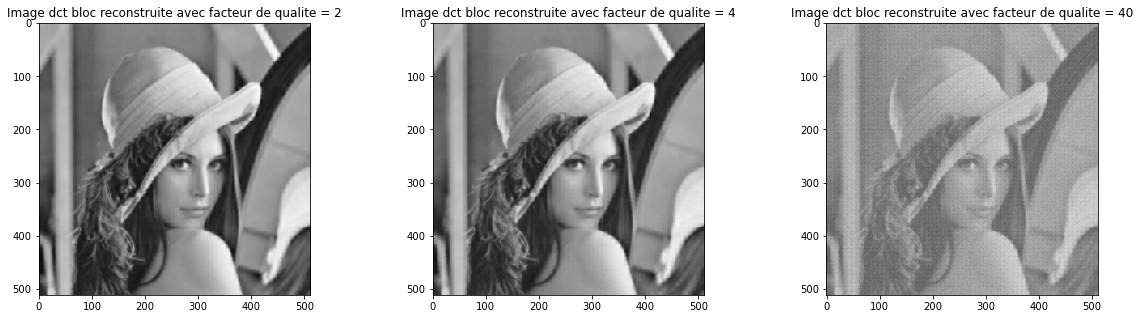

In [13]:
plt.figure(figsize = (20,5))
plt.subplot(131)
plt.imshow(image_rec_bloc_1, cmap = 'gray')
plt.title('Image dct bloc reconstruite avec facteur de qualite = 2')
plt.subplot(132)
plt.imshow(image_rec_bloc_2, cmap = 'gray')
plt.title('Image dct bloc reconstruite avec facteur de qualite = 4')
plt.subplot(133)
plt.imshow(image_rec_bloc_3, cmap = 'gray')
plt.title('Image dct bloc reconstruite avec facteur de qualite = 40')
plt.show()

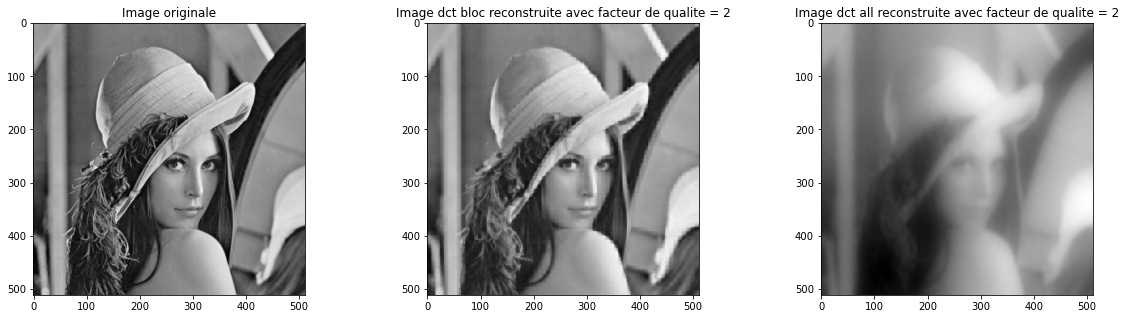

In [18]:
plt.figure(figsize = (20,5))
plt.subplot(131)
plt.imshow(image, cmap = 'gray')
plt.title('Image originale')
plt.subplot(132)
plt.imshow(image_rec_bloc_1, cmap = 'gray')
plt.title('Image dct bloc reconstruite avec facteur de qualite = 2')
plt.subplot(133)
plt.imshow(image_rec_all_1, cmap = 'gray')
plt.title('Image dct all reconstruite avec facteur de qualite = 2')
plt.show()

<span style="color:blue">Commenter les résultats obtenus, notamment les différences entre la quantification sur l'image entiere et sur l'image par bloc ? </span>

Nous pouvons constater que l'image reconstruite par bloc est plus proche de l'image d'origine que l'image reconstruite entière.
Cela est du au fait qu'il y a plus de données dans l'image 2 par rapport à l'image 3. En effet, on effectue la quantification pour chaque bloc de 8bits. Nous avons donc à tous les blocs de 8 bits, la sauvegarde de la plus grande valeur en haut à droite qui pourra être ensuite reconstruite avec plus de détail.

<span style="color:blue">Quel est l'effet du facteur de qualité ?</span>

Le facteur de qualité va donc permettre d'augmenter le nombre de 0 dans chacuns des blocs. plus le facteur de qualité est grande, plus les valeurs moins visible par l'oeil humain seront fortement réduites.


### Pour comprendre l'effet du facteur de qualité, on calcule l'erreur quadratique moyenne

erreur quadratique moyenne : $$\displaystyle MSE =  \frac{1}{nm} *  \sum_{x=0}^{n-1}\sum_{y=0}^{m-1}(I(x,y)-K(x,y))^2$$

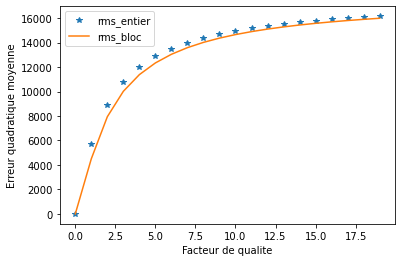

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# essayer avec un "range" de valeur de facteur de qualité entre 0 et 20
#image_modif = list()  #append() gère les listes et conserve les formes itérables (dimensions)

# mean_squared_error(Y_true,Y_pred) Y_true : image originale | Y_pred : image modifie
rms_entier = list() 
rms_bloc = list()
plt.figure()
for qualite in range(20):
    image_entiere=image_rec_apres_quant(dct_image, qualite)
    image_bloc=image_rec_apres_quant_bloc(image, 8, qualite)
    rms_bloc.append(mean_squared_error(image,image_bloc))
    rms_entier.append(mean_squared_error(image,image_entiere))
plt.plot(rms_entier, '*', label = 'rms_entier')
plt.plot(rms_bloc, '-', label = 'rms_bloc')
plt.xlabel('Facteur de qualite')
plt.ylabel('Erreur quadratique moyenne')
plt.legend()
plt.show()

<span style="color:blue">Que se passe-t-il lorsque le facteur de qualité augmente ? L'ereur quadratique moyenne va augmenter ?Le resultats est pire ?</span>


Lorsque le facteur de qualité, l'erreur quadratique augmente aussi très rapidement jusqu'à tendre vers une erreur quadratique de 16000. 
Vers un facteur de qualité de 5, on peut observer une réduction de l'augmentation de l'erreur quadratique (ici à 12000).
Ainsi, lorsque le facteur de qualité est faible et varie un peu, l'erreur quadratique moyenne augmente énormément. Mais pour un facteur de qualité plus grand, sa modification montre que l'erreur quadratique varie peu.

### Q.5 On va appliquer le code de Huffman.
###### fontion Huffman déjà réaliser, il faut seulement la télécharger et l'appliquer.
###### Elle est dans le fichier huffman.py dans le même dossier que ce notebook.

In [27]:
# D'abord, il faut réaliser un fonction pour calculer la DCT par bloc quantifié:
def quantification_par_bloca(image, N, qualite):
     """
    image = image initiale
    N = taille du bloc
    qualite = facteur de qualité quantification
    """
    # écrire code
    dct_par_bloc_quantifie=huffmanEncode(N, image)
    return dct_par_bloc_quantifie

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)

In [29]:
# D'abord, il faut réaliser un fonction pour calculer la DCT par bloc quantifié:
def quantification_par_blocb(image, N, qualite):
     """
    image = image initiale
    N = taille du bloc
    qualite = facteur de qualité quantification
    """
    xh,yv = image.shape
    
    dct_par_bloc_quantifie = np.zeros(image.shape)
    dct = dct_par_bloc(image)    #Calcul de la dct par bloc
    table_quant_q=tab_quantification(N,qualite) #pour générer la matrice de quantification pour cette taille de bloc
    
    
    for i in range(0,img.shape[0],N) : # défile sur l'axe i de l'image 
        for j in range(0,img.shape[1],N) : # défile sur l'axe j de l'image 
            code=huffmanEncode(encoding, pattern)
            
    for i in range(0, yv//N):  #pour parcourir verticalement les blocs
        for j in range(0, xh//N):  #pour parcourir horizontalement les blocs
            x = i*N
            y = j*N
            dct_par_bloc_quantifie[x:x+N,y:y+N] = np.floor(dct[x:x+N,y:y+N]/table_quant_q) #quantification du bloc
    
    return dct_par_bloc_quantifie


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)

In [30]:
# Fonction pour calculer la taille de l'image apres la compressione avec le codage de Huffman
def size_compressed_image(image,qualite,original_size):
    """
    image = image initiale
    qualite = facteur de qualité quantification
    original_size = taille de l'image de depart
    """

    from huffman import huffman_compute 
    freq_dict, enc_dict = huffman_compute(quantification_bloc(image, 8, qualite))
    print ('frequence de chaque valeurs de pixel apres la DCT quantifie par bloc',freq_dict)
    print ('codage frequence de chaque valeurs de pixel apres la DCT quantifie par bloc', enc_dict)
    #Calculer la taille de l'image compressée. Pour chaque valeur on a une probabilite (freq_dict[valeur]) 
    # et une longeur de codage specifique (enc_dict[valeur]).
    compressed_size = 0
    dct_par_bloc_quantifie = np.zeros(image.shape)
    dct = dct_par_bloc(image)    #Calcul de la dct par bloc
    table_quant_q=tab_quantification(N,qualite) #pour générer la matrice de quantification pour cette taille de bloc
    
    
    return compressed_size 

# Q.6 Il faut calculer la taille de l'image compressée et le EQM en fonction du facteur de qualite q (entre 0 et 20).

Vous devez obtenir au final 3 figures:

-Facteur de qualité Q vs Taille dct quantifiée 

-Facteur de qualité Q vs EQM

-Taille dct quantifiée vs EQM

In [ ]:
# calculer la taille de l'image compressée et de l'erreur quadratique moyenne en fontion du facteur de qualité.
# écrire code
#
#
#

In [ ]:
plt.figure()
plt.plot(.............,'r*')
plt.title('Evolution taille DCT 8x8 quantifie en funtion du facteur de qualite')
plt.xlabel('Facteur de qualite Q')
plt.ylabel('Taille dct quantifie [octs]')
plt.show()

plt.figure()
plt.plot(............,'g*')
plt.title('Evolution taille DCT quantifie en funtion du facteur de qualite')
plt.xlabel('Facteur de qualite Q')
plt.ylabel('EQM')
plt.show()

plt.figure()
plt.plot(.............., '*')
plt.title('Evolution EQM DCT 8x8 quantifie en function de la taille de l image')
plt.xlabel('taille [octs]')
plt.ylabel('EQM')
plt.show()

Commenter bien les résultats obtenus !